In [1]:
import numpy as np
import math
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

## Happy Face Dataset

In [2]:
def load_happy_face():
    
    train_dataset = h5py.File("datasets/train_happy.h5","r")
    train_set_x_orig = np.array(train_dataset['train_set_x'][:])
    train_set_y_orig = np.array(train_dataset['train_set_y'][:])
    train_dataset.close()
    
    test_dataset = h5py.File("datasets/test_happy.h5","r")
    test_set_x_orig = np.array(test_dataset['test_set_x'][:])
    test_set_y_orig = np.array(test_dataset['test_set_y'][:])
    
    classes = np.array(test_dataset['list_classes'][:])

    test_dataset.close()

    train_set_y_orig = train_set_y_orig.reshape((1,train_set_x_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1,test_set_x_orig.shape[0]))    
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


number of training data examples: 600
number of test data: 150
X_train shape: (600, 64, 64, 3)
X_test shape: (150, 64, 64, 3)
Y_train shape: (600, 1)
Y_test shape: (150, 1)


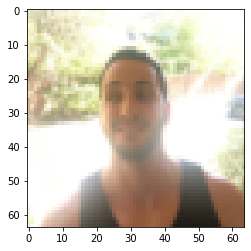

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_face()

#Normalize
X_train = X_train_orig/255
X_test = X_test_orig/255

#Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print("number of training data examples:", X_train.shape[0])
print("number of test data:", X_test.shape[0])
print("X_train shape:", X_train.shape)
print("X_test shape:",X_test.shape)
print("Y_train shape:",Y_train.shape)
print("Y_test shape:",Y_test.shape)


plt.imshow(X_train_orig[100])
plt.show()


## Sequential Model

#### Padding -> Conv2D -> BatchNorm -> ReLU -> MaxPool -> Flatten -> Dense

In [4]:
def happyModel():
    model = tf.keras.Sequential([
        #Zero paddding with 3, settin input shape to (64,64,3)
        tfl.ZeroPadding2D(padding = 3, input_shape = (64,64,3)),
        #Conv2D layer with 32 layers of 7 x 7 filters with stride of 1
        tfl.Conv2D(32,7,strides = (1,1)),
        #Batch Normalization for axis 3
        tfl.BatchNormalization(axis = 3),
        #ReLU Acitvation
        tfl.ReLU(),
        #Max Pooling layer 2D with default params
        tfl.MaxPool2D(),
        #Flatten Layer
        tfl.Flatten(),
        #Dense Layer with 1 unit for output and sigmoid activation
        tfl.Dense(1, activation = "sigmoid"),
    ])
    return model

In [5]:
happy_model = happyModel()
happy_model.compile(optimizer = "adam",
                    loss = "binary_crossentropy",
                    metrics = ['accuracy'])

In [6]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

## Training & Evaluating

In [7]:
happy_model.fit(X_train,Y_train,epochs = 10, batch_size = 16)

Epoch 1/10
38/38 [==============================] - 4s 77ms/step - loss: 0.5856 - accuracy: 0.8000
Epoch 2/10
38/38 [==============================] - 3s 72ms/step - loss: 0.2492 - accuracy: 0.9050
Epoch 3/10
38/38 [==============================] - 3s 72ms/step - loss: 0.1911 - accuracy: 0.9283
Epoch 4/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0993 - accuracy: 0.9667
Epoch 5/10
38/38 [==============================] - 3s 81ms/step - loss: 0.1628 - accuracy: 0.9450
Epoch 6/10
38/38 [==============================] - 3s 81ms/step - loss: 0.1307 - accuracy: 0.9533
Epoch 7/10
38/38 [==============================] - 2s 57ms/step - loss: 0.0863 - accuracy: 0.9667
Epoch 8/10
38/38 [==============================] - 2s 56ms/step - loss: 0.0678 - accuracy: 0.9800
Epoch 9/10
38/38 [==============================] - 2s 56ms/step - loss: 0.1826 - accuracy: 0.9400
Epoch 10/10
38/38 [==============================] - 2s 56ms/step - loss: 0.1904 - accuracy: 0.9350


In [8]:
happy_model.evaluate(X_test,Y_test)

5/5 [==============================] - 1s 52ms/step - loss: 0.1630 - accuracy: 0.9533


[0.16300910711288452, 0.95333331823349]

## Complex Model with Functional API

### Dataset

In [9]:

def load_signs_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


training examples : 1080
test examples : 120
X_train shape (1080, 64, 64, 3)
X_test shape: (120, 64, 64, 3)
Y_train shape: (1080, 6)
Y_test shape: (120, 6)
this is number: 2


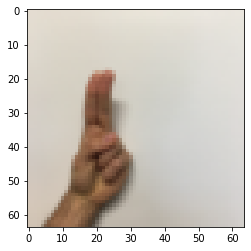

In [10]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

X_train = X_train_orig / 255
X_test= X_test_orig / 255
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print("training examples :", X_train.shape[0])
print("test examples :", X_test.shape[0])
print("X_train shape", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

plt.imshow(X_train_orig[10])
print("this is number:", np.squeeze(Y_train_orig[:,10]))

## Model, forward

In [11]:
def convolutional_model(input_shape):
    
    input_img = tf.keras.Input(shape = input_shape)
    
    # conv2d layer with 8 layers of 4 x 4 filter, with stride of 1, same padding
    Z1 = tfl.Conv2D(filters = 8, kernel_size = 4, padding = "same")(input_img)
    
    # ReLU activation
    A1 = tfl.ReLU()(Z1)
    
    # MaxPooling with 8 x 8 window, stride 8, with same padding
    P1 = tfl.MaxPool2D(pool_size = (8,8), strides = (8,8), padding = "same")(A1)
    
    #Conv2D layer with 16 layers of 2 x 2 filter, stride 1 with same padding
    Z2 = tfl.Conv2D(filters = 16, kernel_size = 2, padding = "same")(P1)
    
    #ReLU activation
    A2 = tfl.ReLU()(Z2)
    
    #Max Poolin layer with 4 x 4 window, stride of 4 same padding
    P2 = tfl.MaxPool2D(pool_size = (4,4), strides = (4,4), padding = "same")(A2)
    
    #Flatten
    F = tfl.Flatten()(P2)
    
    ##Dense Layer
    output = tfl.Dense(units = 6, activation = "softmax")(F)
    
    model = tf.keras.Model(inputs = input_img, outputs = output)
    
    return model

In [12]:
conv = convolutional_model((64,64,3))
conv.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ['accuracy'])
conv.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0     

## Training 

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv.fit(train_dataset, epochs = 100, validation_data = test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 71ms/step - loss: 1.7972 - accuracy: 0.2083 - val_loss: 1.7876 - val_accuracy: 0.2167
Epoch 2/100
17/17 [==============================] - 1s 64ms/step - loss: 1.7845 - accuracy: 0.2435 - val_loss: 1.7836 - val_accuracy: 0.2833
Epoch 3/100
17/17 [==============================] - 1s 75ms/step - loss: 1.7807 - accuracy: 0.2704 - val_loss: 1.7788 - val_accuracy: 0.3833
Epoch 4/100
17/17 [==============================] - 1s 75ms/step - loss: 1.7753 - accuracy: 0.3000 - val_loss: 1.7744 - val_accuracy: 0.4250
Epoch 5/100
17/17 [==============================] - 1s 79ms/step - loss: 1.7694 - accuracy: 0.3269 - val_loss: 1.7680 - val_accuracy: 0.3833
Epoch 6/100
17/17 [==============================] - 1s 81ms/step - loss: 1.7623 - accuracy: 0.3296 - val_loss: 1.7598 - val_accuracy: 0.4250
Epoch 7/100
17/17 [==============================] - 1s 58ms/step - loss: 1.7522 - accuracy: 0.3528 - val_loss: 1.7473 - val_accuracy: 0.4417
Epoch 

17/17 [==============================] - 1s 73ms/step - loss: 0.5553 - accuracy: 0.8241 - val_loss: 0.6181 - val_accuracy: 0.7333
Epoch 59/100
17/17 [==============================] - 1s 73ms/step - loss: 0.5480 - accuracy: 0.8241 - val_loss: 0.6124 - val_accuracy: 0.7250
Epoch 60/100
17/17 [==============================] - 1s 70ms/step - loss: 0.5406 - accuracy: 0.8241 - val_loss: 0.6068 - val_accuracy: 0.7250
Epoch 61/100
17/17 [==============================] - 1s 67ms/step - loss: 0.5338 - accuracy: 0.8259 - val_loss: 0.6020 - val_accuracy: 0.7250
Epoch 62/100
17/17 [==============================] - 1s 67ms/step - loss: 0.5272 - accuracy: 0.8296 - val_loss: 0.5968 - val_accuracy: 0.7250
Epoch 63/100
17/17 [==============================] - 1s 65ms/step - loss: 0.5209 - accuracy: 0.8324 - val_loss: 0.5914 - val_accuracy: 0.7250
Epoch 64/100
17/17 [==============================] - 1s 80ms/step - loss: 0.5148 - accuracy: 0.8343 - val_loss: 0.5868 - val_accuracy: 0.7250
Epoch 65/100

c:\users\howuseeit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

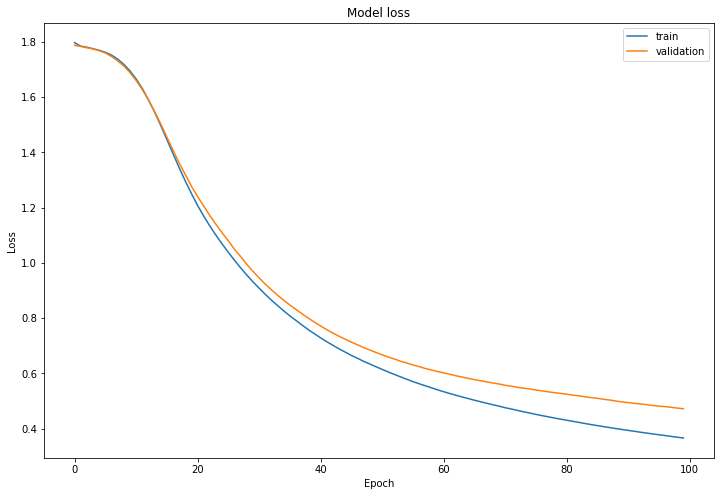

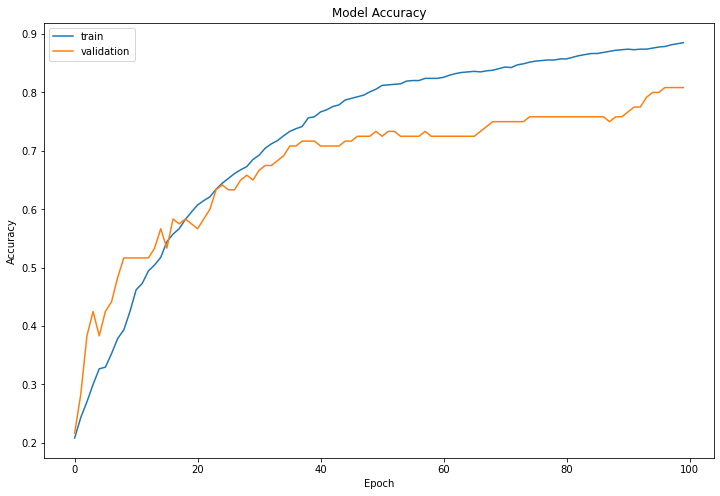

In [14]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')